## **TEXT EMBEDDING **

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [ ]:
list(genai.list_models())


[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
      

In [ ]:

from typing import Dict

result : Dict = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# # 1 input > 1 vector output
# print(str(result["embedding"])[:50], "... TRIMMED]")

result['embedding']

[-0.0032167432,
 -0.013358688,
 -0.017649611,
 -0.009181082,
 0.039267033,
 0.0003872481,
 0.048983485,
 -0.0023305437,
 -0.020243663,
 0.01239466,
 -0.015487689,
 0.007854722,
 -0.0036892132,
 -0.038751096,
 -0.014143613,
 -0.03157482,
 0.043664,
 -0.012639749,
 -0.013856961,
 -0.035368875,
 -0.02083169,
 -0.027724843,
 0.022817131,
 0.014411992,
 -0.010126492,
 -0.025422359,
 0.034461003,
 -0.049600344,
 -0.007758252,
 0.03216249,
 -0.031210061,
 0.018713742,
 -0.06506595,
 -0.014446416,
 0.037912812,
 -0.047814425,
 0.017829163,
 -0.030598102,
 -0.08004067,
 0.014093506,
 0.04482803,
 -0.039980683,
 -0.037098397,
 -0.03632372,
 0.015360409,
 0.015400565,
 -0.020891549,
 0.055550124,
 0.023014015,
 -0.119045444,
 0.019397745,
 0.02449417,
 0.1097423,
 -0.021818591,
 -0.024052579,
 -0.026254697,
 0.04824734,
 0.004709444,
 -0.012893013,
 -0.012916473,
 0.007871744,
 -0.020871392,
 -0.00011949513,
 0.04222497,
 -0.0055988794,
 -0.03899682,
 -0.0028476026,
 0.03703612,
 0.04640705,
 -0.

In [ ]:
len(result['embedding'])

768

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...", len(v))

[-0.036453027, 0.033254996, -0.03970925, -0.002628 ... TRIMMED ... 768
[-0.01591948, 0.032582663, -0.081024624, -0.011298 ... TRIMMED ... 768
[0.00037063024, 0.03763057, -0.122695684, -0.00951 ... TRIMMED ... 768


In [ ]:
len(result['embedding'])

3

In [ ]:
!pip install -Uq langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.7 MB/s eta 0:00:0

In [ ]:
!pip install pinecone
!pip install pinecone-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pinecone-plugin-inference
    Found existing installation: pinecone-plugin-inference 3.1.0
    Uninstalling pinecone-plugin-inference-3.1.0:
      Successfully uninstalled pinecone-plugin-inference-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pinecone 5.4.2 requires pinecone-plugin-inference<4.0.0,>=2.0.0, but you have pinecone-plugin-inference 1.1.0 which is incompatible.


In [ ]:
import getpass
import os

In [ ]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

In [ ]:
from google.colab import userdata
import os
PINECONE_API_KEY = userdata.get('PINECONE_API_KEY')
os.environ['PINECONE_API_KEY'] = PINECONE_API_KEY

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY
PINECONE_ENVIRONMENT = 'us-east-1'

In [ ]:

import os
from dotenv import load_dotenv

load_dotenv()
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")

In [ ]:
import os
from pinecone import Pinecone, ServerlessSpec


pc = Pinecone(
    api_key=PINECONE_API_KEY
)

# Check if the index exists; if not, create it
index_name = "rag-gemini"
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=768,
        metric="cosine",  # Choose the metric: cosine, euclidean, or dotproduct
        spec=ServerlessSpec(
            cloud="aws",
            region=PINECONE_ENVIRONMENT  # Use your environment's region
        )
    )

# # Connect to the index
index = pc.Index(name=index_name)
print(f"Successfully connected to index: {index_name}")

Successfully connected to index: rag-gemini


In [ ]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

In [ ]:
!pip install -Uq langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",
                                          google_api_key=userdata.get('GOOGLE_API_KEY'))
# embeddings.embed_query("What's our Q1 revenue?")

In [ ]:
from langchain_chroma import Chroma
# from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents,
    embedding=embeddings)

In [ ]:
vectors = embeddings.embed_documents(
    [
        "Today is Monday",
        "Today is Tuesday",
        "Today is April Fools day",
    ]
)
len(vectors), len(vectors[0])

(3, 768)

In [ ]:
list(dir(vectorstore))

['_Chroma__ensure_collection',
 '_Chroma__query_collection',
 '_LANGCHAIN_DEFAULT_COLLECTION_NAME',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_asimilarity_search_with_relevance_scores',
 '_chroma_collection',
 '_client',
 '_client_settings',
 '_collection',
 '_collection_metadata',
 '_collection_name',
 '_cosine_relevance_score_fn',
 '_embedding_function',
 '_euclidean_relevance_score_fn',
 '_get_retriever_tags',
 '_max_inner_product_relevance_score_fn',
 '_persist_directory',
 '_select_relevance_score_fn',
 '_similarity_search_with_relevance_scores',
 'aadd_documents',
 'aadd_texts',
 'add_

In [ ]:
vectorstore

In [ ]:
vectorstore.similarity_search("cat")

[Document(id='1b7279e5-e0f8-402e-bd5d-311437c4256d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(id='64b3ed07-3032-4806-a0f4-816c5acd2158', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(id='3e1ad838-1598-4163-8073-a0a2970e6771', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
 Document(id='3852716d-9f68-4da0-9e78-e7387f2399db', metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]

In [ ]:
await vectorstore.asimilarity_search("cat")

[Document(id='1b7279e5-e0f8-402e-bd5d-311437c4256d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(id='64b3ed07-3032-4806-a0f4-816c5acd2158', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(id='3e1ad838-1598-4163-8073-a0a2970e6771', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
 Document(id='3852716d-9f68-4da0-9e78-e7387f2399db', metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]

In [ ]:
# Note that providers implement different scores; Chroma here
# returns a distance metric that should vary inversely with
# similarity.

vectorstore.similarity_search_with_score("cat")

[(Document(id='1b7279e5-e0f8-402e-bd5d-311437c4256d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
  0.6390674114227295),
 (Document(id='64b3ed07-3032-4806-a0f4-816c5acd2158', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
  0.8766832947731018),
 (Document(id='3e1ad838-1598-4163-8073-a0a2970e6771', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
  0.8958533406257629),
 (Document(id='3852716d-9f68-4da0-9e78-e7387f2399db', metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'),
  0.93742835521698)]

In [ ]:
embedding = embeddings.embed_query("cat")# convert cat into vector

vectorstore.similarity_search_by_vector(embedding)

[Document(id='1b7279e5-e0f8-402e-bd5d-311437c4256d', metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(id='64b3ed07-3032-4806-a0f4-816c5acd2158', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(id='3e1ad838-1598-4163-8073-a0a2970e6771', metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
 Document(id='3852716d-9f68-4da0-9e78-e7387f2399db', metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]

In [ ]:
embedding

[0.02929222583770752,
 -0.036574799567461014,
 -0.043439045548439026,
 -0.07810205221176147,
 -0.0037615408655256033,
 0.009293069131672382,
 -0.01828901655972004,
 -0.026278767734766006,
 0.0257037952542305,
 0.04369331896305084,
 0.021304260939359665,
 0.004027269314974546,
 -0.006600249093025923,
 -0.015647996217012405,
 0.031169898808002472,
 -0.015230076387524605,
 0.03932645171880722,
 0.05131302401423454,
 -0.0035581118427217007,
 -0.028116988018155098,
 0.003778817830607295,
 0.020366402342915535,
 -0.003293826477602124,
 0.006887518800795078,
 0.030619945377111435,
 -0.017671264708042145,
 0.05062692239880562,
 -0.06273413449525833,
 -0.007996084168553352,
 0.04244242236018181,
 -0.039237722754478455,
 0.026849912479519844,
 -0.07410523295402527,
 0.011468383483588696,
 0.015611913055181503,
 0.00010844393545994535,
 1.2158683603047393e-05,
 -0.02252042479813099,
 0.007573829963803291,
 0.042349569499492645,
 0.019335489720106125,
 -0.03577505424618721,
 -0.022801458835601807,

In [ ]:
from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda

retriever = RunnableLambda(vectorstore.similarity_search).bind(k=1)  # select top result

retriever.batch(["shark"])

[[Document(id='64b3ed07-3032-4806-a0f4-816c5acd2158', metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.')]]

In [ ]:
!pip install -Uq langchain-google-genai

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI



llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                             api_key = userdata.get('GOOGLE_API_KEY')
)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
# Example: Defining rag_chain if it is part of an external library or setup


message = """
Answer this question using the provided context only.

{question}

Context:
{context}
"""

In [ ]:
prompt = ChatPromptTemplate.from_messages([("human", message)])

In [ ]:
response = rag_chain.invoke("tell me about Allama Iqbal")

print(response.content)

The provided text does not contain any information about Allama Iqbal.


In [ ]:
rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm

print(response.content)

The provided text does not contain any information about Allama Iqbal.


### **FACE DETECTION EMBEDDING**


In [ ]:
!pip install -Uq facenet-pytorch

In [ ]:
!pip install -Uq pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()
model

In [ ]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
save_image_from_url("https://media.licdn.com/dms/image/v2/D4E03AQEEn9DuNlQwvw/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1664654245747?e=2147483647&v=beta&t=NGB0a9aqsgdyxpbuO3rqws95ogJnL_6aRtBDS7IWPfw","s1.jpg")
save_image_from_url("https://avatars.githubusercontent.com/u/10209765?v=4", "q1.jpg")
save_image_from_url("https://media.licdn.com/dms/image/v2/D4D22AQFmuEiR8ttUmw/feedshare-shrink_800/feedshare-shrink_800/0/1711203894556?e=2147483647&v=beta&t=GEZGp_cdogNJCJIGidoEw_DjW2FXZcG4nUUlaNF1Zlc","z1.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBBiqefc7Le97Rn0udVVBkur7RlU53FcQh1A&s",'z2.jpg')
save_image_from_url("https://scontent.fkhi4-4.fna.fbcdn.net/v/t39.30808-6/468785380_10160566910882765_300507882801991935_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=6ee11a&_nc_eui2=AeEk77SJKagGymTo3ibNnnx9YsjCm8DJ0lRiyMKbwMnSVMJqs7YWsJDuzKzXyLHLoFk&_nc_ohc=QJMm9K-AE4QQ7kNvgFE0N2o&_nc_oc=Adi1r8eogMcuDIMMLJvliCOnaaXQ2KnUbbJvY94aAnfInkDB-fyB_1ZXBpDQnWTkZnY&_nc_zt=23&_nc_ht=scontent.fkhi4-4.fna&_nc_gid=AcSynbwc6ukNTxWnUzjhtEe&oh=00_AYCvnF-vj63T-X69PZgBk6JvVjepzybVukgHPSM_6BXkGQ&oe=678003A4",'s2.jpg')
save_image_from_url("https://i.ytimg.com/vi/7QD3GKvSyMk/hqdefault.jpg?sqp=-oaymwEmCOADEOgC8quKqQMa8AEB-AHOBYAC0AWKAgwIABABGGUgXChPMA8=&rs=AOn4CLB2EaZsLrClGHqUMUhApQ_sxAcF7Q","q2.jpg")
save_image_from_url("https://media1.faz.net/ppmedia/w1240/aktuell/politik/usa-unter-trump/66414023/1.5127773/16x9/donald-trump-ist-ein-drueckeberger.jpg","d1.jpg")
save_image_from_url("https://media1.faz.net/ppmedia/w1240/aktuell/politik/usa-unter-trump/66414023/1.5127773/16x9/donald-trump-ist-ein-drueckeberger.jpg","d2.jpg")


Image saved to: images/s1.jpg
Image saved to: images/q1.jpg
Image saved to: images/z1.jpg
Image saved to: images/z2.jpg
Image saved to: images/s2.jpg
Image saved to: images/q2.jpg
Image saved to: images/d1.jpg
Image saved to: images/d2.jpg


Error downloading image: No connection adapters were found for ''

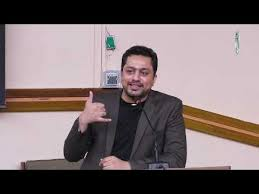

In [ ]:
save_image_from_url("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEhUSEhIVFRUQFhAVFhcWFRUVFxYQFRUXFhYWFxYYHSggGBolHhcVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0dHx0tLSstLSstLS0rKy0rLS0tLSstLS0rLS0tLS0tLS0tKy0tLS0tLS03Li03OCsrLSsrK//AABEIAMIBAwMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAAAQIDBAUHBgj/xABJEAABAwEDBgoECgkFAQEAAAABAAIDEQQhMQUGEkFRkRMiUmFxgZKhsdEyU3LSBxYkM0JDVLLB8BQVFzRzgpPC4SNEYqLxo2P/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAhEQEBAAICAQUBAQAAAAAAAAAAAQIRAxIxEyFBUWEEIv/aAAwDAQACEQMRAD8A4aiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICldIzCYP0k3D5t/i1dQhibyRuCNTHb5nRfUccTeSNwV9sLeSNwRelfKqL6u4FvJbuCkQt5LdwQ6PlBF9YcA3kt3BOAbyW7gh1fJ6L6w4FvJbuCngW8lu4IdXyci+seBbyW7gqXxNp6LcRqG0IdHygi+rZIm3cVuI1DYqImtJcC1tzjqGGr8dyHR8qovq/gW8lu4IYW8lu4IdK+UEX1dwLeS3cE4FvJbuCHR8oovq3gW8lu4JwLeS3cEOj5SRfV3BN5LdwTgm8lu4IdHyii+rTC3kt3BRwLeS3cEOj5TRfVnAt5LdwTgW8lu4IdHymi+rOBbyW7gnAt5LdwQ6PlNF9WcC3kt3BQ6Ng+i2/mCHR8qIvqvgW8lu4KDC3kt3BDo+VUX1TwLeSNwRDo5BmD+9H+G77zV1GBcvzAHyo80b/vNXUYVb5aw8MuNZDQrEavhGlSrAVKkFBUiIiUREUQVEuHW3xCrVEmHWPFFimXV7X9rl57K2XGWeWhrpCuqoLSXNobxfpAn/1egmxb7Z+49c8zni+USmtSCCG6yHG8Dnqa02V2LWLz/wBfJnx8e8PL31htYlYHjBwBGq4gHC/btWSvOZmz6UAaQQYy4EEU+kSPzzL0SldeLK54TK/IVC1+VsvWay/PzNYTg3Fx59EX0Wphz+sDruGoedrh1qOm3pkWPYbdFO3Tie17drSDfz7FkICKVCCCoVShASilEFKKpEELXWo/KIRU31FKGhJNam7UGml62NFjW2McR/0g9u6oH9yMcnhkIpIUURtCKaKEHG8wB8qP8N33mLqkIXLvg9/ej/Cf95q6lCrfLOHhlMVwKhqutUaVBS1QpagrVKqUFBAVShSiewqJMOsKuipk/EIsW5sY/b/setXbclwyvcZC7jEggPc2uOppxp3Laz4x+2fuPURx8YkbfPzQYeS8lR2duiwUqak6ycLzruAHUvP5/Z2foTOCiNJ3gEGgOhGTTSvuqaGgXsSuN5wt/SMrysdQhr4mj2WxsqN+kifkeXlgtVpJkIfIXYuxJPPrKsyWGYCronAC4nRIXb7HYWUuAbW/ACqqnyYHDUVz711nBL8uF2a1yQuDmvc28XglpFMDcu1Zj51i3NMbq8LE0Em6j24Fwpga0r0rzuceSIeDfWNtQDq1rSfBc4syg1oOMU7XbCLneLQtY5bc8sOlm3ZioVSLQpREQEREBERAVl7eODStxHRe03jWKDfRXkRLNwCgqURVKKpEHG/g9/enfwn/AHmrqUK5b8H/AO9H+G/7zV1KFW+WcPDLarrVaYrwCjSVWFFFUECiUUojKEopRAoqJNXSFWqXjDpCNLc1xZ7Xi1w/HvVJtUbSQXC49PgreUsB0nwWgtmUxZw0mMEOB41G10tIjRvGy/oaRrWscZfLOWWnpTbIzSjxf0rmULWtntloIvdPIwOcK0YKGoGw1/6r0Nmy2JzRsejQNq7ig1qLqADUHHG6it2WBmlI15FHOce9Tkkkb4P9X3aqzZzPaRouZK2oBAaWuBOokraZXzi0CGCE6bgCG6VO9XI8nQNc1ofXSdW80FRsGtY+U8lttMr2uLQaUbXX0EYG9c3q61gyW7hOLJHo6WI0g6/ZULT/AAa2F36zkNDowxzX87nMa0dYLty3LsjCAuLjVx1VNB0BZ/we2V7XzyUGjOSa/Sqw6LR0en3KY33sc+XG2Tb21EVShdHBSUoqlCCFKUSiCKKFUoIQQimiUQQimiUQQimiIOOfB8PlR/hu+81dThZzLh1ktD4ySxxaaUqCQaEjYskZZtA+uk7bvNTky6045uO6MYrzWFcJblu0evk7bvNVDLc/r5O27zXL1fx09P8AXdwxTorhX65n9c/tu81DsrzH6156Xv8ANPW/D0/13bRKaC4QcqS+sdvcqTlGT1jt5T1vw9P9d50U0VwF9uk1vcesqgWp+oneU9X8PT/X0CRzq3I4XXjHaFwM2mQ0Gk6gwFTQLZW2wcHZoLQ17iZdIPacGuvoW81AtTO34PT/AF13KczQWVIoKl1+AupvvXkcs2YTFp0iODDhcGmpLq1qXDbSlFzqWcvFHXg6v/VjGxxcgbgumGdnw454y/Lpub+T2Mkq55po6J+bFQXMvFHnk7NatZXe2N72g8YgPadukDS/pqOpc4jgY01DACL601ra2eN7YRPiS8mn/wCYoKDm4pPWnJe0a4r1vs3bLLPIaSivB00SHjAip+jUH81VqC1uszyGxvOlTSJq4UqOMHVor/6zs9oo7hXxGlBoOxdz1BFFi5WytFEykby5x1k39Kz8PReSa23Ftme+pJreAOc7F7fN+xmGFocKON7gaXG+65cTlyrKS0hxbQgtINKFpB0hz1ovQ5O+Ee2sIEgjmaMSW6Dz/Mzig/yqY4/Lnycu3XUXksl/CBZJaCTShJ5Y0m19puA6QF6izWlkjdKN7Xt2tcHDeFtz2uFAEUoCgqVCCEREBERARQUQSiiqIOA5PiaSS+oaBU0rXEAYLbxRWTWXnt+a1QlaRdG1pOsONfBXY6bV5+fP33HXh9sdNy2OwjU/fJ7yuaNgP0Hb5PxctONHlK4A3ldy8tyrv2jZgWIfQdXoJ7tK9WqWXZ/8x+L1h0btO4qaD/l2Sp3z+jtGyjmsIF8JPPojzVX6TYvs/wD1b7y1gZzP7J8lPBHU2TsO8lN5neNmbXYvs1eljPNUm32Mf7VvZjWt4B/q5D/K7yU/orz9VJ2HeSv+/pe8bvJk1lmkbG2yMq7WWx0A1k3allZ35Oe5kMUMbiGlxo1twoBTC4YlY+aVhcJDIWuboinGBFSdlehe1MoAqRVevhtk3WMv9TTktoyVKwVfE9o20u3rE0F1a0zODbqX1xAuHRrXMrZHoSObUGjnXjA36l6Mbt5eTj6+7EcKAnmKyMhZxsbEIJ7gBxX0uofou8+ZWrRcxx5j4LQmIK5YyucyuN3G3yjZ4CeEjkjNKkgObU9VVS6KCJ1ZXh1Gg0YCeMQCG1GNxx5liZPyvPZg4QzyRiS5wYaaXSsRoDzQ1q41Os7ST03rMx0vqT6boScJx9HRbQBrdjdXX5q0H0uAxWWwXCmF1OhUTNAJOvDrWmd7WQ0krJs5fGdJjnMcMHNcWkdBCmNmiL8cVS9+rWbzzN1qj32ZWd80krLNPx+EqGPuDqgE8blVpSuPSugEL5/ssh4VrmkjRIoQaHqIwXsLDnPaosJnOGyTj9543evPy8047Nu3Hjco6gi8bZM+z9bB1xu/td5rdWTOiyS/Whh2SAsv9o8U9RTHmwy8VbhY26USMhwq0gg6wajeFJC6SopUkKUV2ilQqioTYiiKUTY8xZskRj6tvZCzosnRj6tnZC2fBBTwaahvbFZYo/Vs7IV9tkj5DeyFd0VIV1BbFmZyW7gqxA3kjcFcClE2tiIbB3KeCGwblWgQ2oMY2LByvlCOztbpelIQ1jdZcSL+YCt58wtl3c645l3Lf6TbxI01a17WR8zGnEDnNT1po37ugaVRpE1JrerT7SG68ML7qrT5Syg6KMm64EjoXO5c5Z5SeNo+ysad8uSY+XVcpSz8EXQtDydQe1p6q4rwGULLapJHSvgeLqmjSQABj3YrVxZWnH1z96uNyxO6oMr6UpStLjiLtS1I5Z545LFsk4h6h3rUkrMyi/igbT4LBBPWum3nUlbLI1nvLtgp1n/CwFvclspGOe/f/hQTBxNJvJvHsn/N3WFS6g4x/JU2vEOH0MfZOPmrcjtJ4AwF6Kuk7ecnoWO4kCpHpm/o1NFMVXb5NFtOUQOpW479teipI8Goq/k94bIxzxVtRpDaDiG9C9WbJA/0ZNE7H3X9Jp4rx5r+bz5Bb6CSrQa4gLwf2TWrp6v58vMZ0mRpBeAHDa0+dBuWHJC5hvBHT+CrjkLfRJb7JI7llx5UkwcQ4f8AIX06R5Lw7xen2rEstofGase5h2scW76Lc2TPG1R3Oc2QbHtoe02nfVYRtcLvTiLa/SYaivSKeCCxRP8Am5QeZ2P4HuXSZZTxTpK9TZM+oz87C9vOwh4r3Fbux5ess1AyZlTqcdA7nUr1Lms2SpW/RrztNe7HuWHJGRcR1EUO7Fdcf6c55c8uGfDs9FBC5LYsrzw3RyvaNlai7mNQtxY89rQz0wyQc40Hb23dy74/1YfPs53isdC0UXk2Z+x0vgfXmc099yLp6+H2nTJ6sBTRVIvQ4KaJRVKFFiFKIhRKIpCI8xn/AJZ/RrMWtP8AqWjSY3mZTju3ED+YLj0Fs4KQSUBLamhwvBGrpr1BbjPXLTrVaXuwbGTGwbGtJv6TivMTO2KsWttlXOV08bY6UIaA87XUvpzLzrH0J6lepQKwahwH+Uhct1tYG6Qqsizx4nnVuzGjVmWX0eklVGtyliBsBPf/AIWHgr2UJayOGyg3D/KsE05ykRUKnDEr0cdGt5mjwWhsLKvaOeu5be0uvDegnoGA/OxFinhbuc3npKxIyWXjXt1cyzHXLDdV1+oEjruQql79N7QTtK2TWnUd4Woaf9QU1C5bQSgXGpOwCqBKKXeC6hm3kSz2mxQOfG0nQoXC51WuIN46Fy/SBwrXYbvFdX+Dd9bCwcl8w3vLv7lmzbeN1WNa8yG/VSubzOo4LTWrNa0s+i142sNDuK6TRCFwy/nwvw6zOuO2myPbc5rmH/k0jvwWOWHYCF2aSFrrnAHpvWptmbFmkqeD0SdbTonuXG/y/VdJy/bmkNqewcV7m82I3FZrMsPIpI1kg3Hy7l6K2Zj64pT0OAI3rSWzNi1R4xh42sP4FccuDknxt1nLFoTWZ+LXRnaLx3V8FUMmtffHI1/Nge7yWqlicw0c1zabRRUh2u7wXKyzzG+2NbF2Sn8nvHmixW2yQXBz+px80WfY/wAuyqURfcfPRVFNEooIRToqkyNH0hvCgkq1apNFj3DFrXu6wCfwVq0ZSgZ6c0bfae0eJWJPl2yEOabTFxgQeOMCKIOCzPrft8Viucr9sjMbiwmugSK6iBcCOY4rCe5Vzqt192KiyxVNVtMlR8CySZwIfoaMIcCDwkh0XSDZoNDqHa5uyotWWLuQ0uNFyzIHAMrsqfxUWewvkroMLtEVNATQG4E7L16KyZkzyx8d7YwR7Rp3DvS2RrHG5eHPa1JOJcSVWxlLyvV5dzHnsw0ozwzRjQaLuzrHQvKuJrTWLiNYI1EKy7Zyxs8s7JLeM5x1D8+Cy2GpLtvhqWNZRRgHLJJ6MAFfdJRCLVsloqYh/p43aR0hsJFBvv3BWZ4HnVdtV+Bv+m9pxLoj4hIixYQC555NB+K2ULgBhRYsNhp17VlCz0Fw/PNsRUvJOzpN+6i6f8F5+RmuqWTwauVadLtx28xG1dW+DBvyMnlSyHcGj8FGsXrlClFGkKURRpCEKVCosz2djxRzQ7pAK0tszSssl4ZoHawkL0BChS4yrLY8Q/4PmEmkz+5F7dFj0sfpe1VqlzqL50/aNlT7W7+nF7ig/CJlQ/7t39OL3F124dnaM78tSQxgwu0TpX3A3U5+deJOWJbQA+SR1S1laEtGA1DaaleBtmd9tmFJJy7+WMeDVhxZctDRRshA6G+SzWrnNOivId6VXe0SfEqng28kblz/AOMFp9adzfJPjDafWnst8lNJ2dDawamjcFVpLnfxitXrT2WeSj4w2n1p7LfJOp2e7tlijlpptrTXeDvCsQZIhYQ4Rio2kkdNCV4v4w2r1p7LfJPjBafWnc3yTSbj0uUn8I/mbcPz+cFjxx0XmzlWbl9zfJP1tNy+5vkt7Tb3uRLY2IivpPc1pxuZdeNpr4BdKsTBQU0iNRfcekB146gvnqPLE7SHCQgtNQaNx3LZNz2ygMLS7sx+6sWbdsObrNO6PjxBNVrZ8hWeY1kiY47SBXfiuP8Ax6yj9pd2I/dUjPrKI/3J7EXuqdW7z434eqy9kkQyuYBdcR0LXgUFCAV5i2ZzWuZ2lJMXGlK6LBd1BWP11P6z/qw/gukrz2zb1tjsznuLGuDQGl3o1uBwxV205JZGKumIqKm4C5t41ryMWX7Q30XgVFPm48Oyq35y2p2MgPTHEfFq1MpGXrsnWKORpLZn3HDinxxHQsQS6ibxUdYJC823OS1BwcJKECgoyMXVrgG0V4Z223157EfuqXKLNNqRiNfjsK7LmNZxDYYATQuaZDW75xxfgeYhcF+N1t9eeyz3VBzstvrz2We6s7alj6WNoZy27wqHWyMYyM7TfNfNnxstnrz2We6hzstvrz2We6p7r2xfSByjD61naCpOVYB9Y3v8l84fGu2evPZZ7qHOu2evPZZ5J7r3xfRjcswFzWCS95DRxXXuPUtgvmSPOy2Nc1wnNWEOB0IzRwwIq1Z/7Rsqfa3f04vcVS5z4fRZUL51/aNlT7W7+nF7iftGyp9rd/Ti9xDu+ikXzr+0XKn2t39OL3EQ7vKoiI5iIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP/Z","q2.jpg")

In [ ]:
# Example usage
image_path = "./images/q2.jpg"
q2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", q2.shape)
print("Image Embedding:", q2)

Image Embedding Shape: (512,)
Image Embedding: [ 0.00058278 -0.01463299 -0.10330156  0.03984531  0.0852564   0.08029356
 -0.01011137  0.04867228 -0.00259887 -0.00771981 -0.03319051  0.06225289
  0.01708763 -0.00982597 -0.01638002  0.00054205  0.04426369  0.0051972
  0.04448378 -0.089792   -0.06033408 -0.00162233  0.09186836  0.03262275
  0.06873462  0.02532323  0.03512868 -0.05809449  0.0015173   0.05172819
 -0.04107906 -0.03755801 -0.04134395 -0.00761166 -0.00674728  0.04443467
  0.00570055 -0.02845278 -0.12002272  0.0552823   0.00132485  0.00437373
 -0.02495592  0.01842855 -0.00357918  0.01889838  0.02980517  0.10357357
 -0.11238682 -0.02633034  0.02794238 -0.01528806  0.04015449 -0.00394581
 -0.09202525  0.07156517 -0.03382099  0.07384291  0.01921723 -0.04263638
  0.02758527  0.03841294 -0.04435984 -0.05347931 -0.04511736  0.03700711
 -0.00194127 -0.00450153  0.03157886  0.02796172  0.02416226  0.01202647
 -0.00905222  0.00880151  0.01898727 -0.0136397  -0.04995866 -0.01557561
  0.0

In [ ]:
image_path = "./images/s2.jpg"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)


Image Embedding Shape: (512,)
Image Embedding: [-1.11871138e-02 -1.03831686e-01 -6.49789050e-02  6.26160726e-02
  5.31825610e-02  2.93166488e-02  2.85818242e-02  1.07557196e-02
  2.30577234e-02  2.11645383e-02  4.49966900e-02 -1.05088158e-03
  5.12557663e-02 -1.57792885e-02  2.27004234e-02  4.33514901e-02
 -4.31503654e-02  3.46557125e-02  3.98751982e-02  4.01685536e-02
  1.22629199e-02  3.47619392e-02  3.74376588e-02 -2.92636100e-02
 -1.95952151e-02  7.84217641e-02 -1.65973697e-02 -7.39310086e-02
  1.87867805e-02 -3.93897109e-02 -3.14862765e-02  2.39189602e-02
 -2.03516930e-02 -3.26002911e-02  3.72588336e-02  1.85265448e-02
  4.76108454e-02 -1.18854186e-02 -3.72914933e-02 -1.12608159e-02
 -1.34668760e-02  2.98969969e-02 -4.51772772e-02 -4.26033586e-02
 -5.81922159e-02 -1.54331988e-02  4.68713194e-02  8.94588456e-02
 -5.68718836e-02  1.97886098e-02 -1.02427220e-02  3.88370603e-02
  1.36065325e-02  3.18911038e-02 -3.45598124e-02  1.28371734e-02
  4.65074666e-02  5.49756289e-02 -4.1339218

In [ ]:
q1 = create_image_embedding("./images/q1.jpg")
q2 = create_image_embedding("./images/q2.jpg")
s1 = create_image_embedding("./images/s1.jpg")
s2 = create_image_embedding("./images/s2.jpg")
z1 = create_image_embedding("./images/z1.jpg")
z2 = create_image_embedding("./images/z2.jpg")
d1 = create_image_embedding("./images/d1.jpg")
d2 = create_image_embedding("./images/d2.jpg")

In [ ]:
!pip install -U milvus-lite

!pip install -U pymilvus

In [ ]:
from pymilvus import MilvusClient
client = MilvusClient("./milvus_demo.db")


In [ ]:
from pymilvus import MilvusClient
import numpy as np

client = MilvusClient("./milvus_demo.db")
client.create_collection(
    collection_name="images",
    dimension=512  # The vectors we will use in this demo has 384 dimensions
)

In [ ]:
data = [
    {"id": 1, "person_name": "Qasim", "vector": q1},
    {"id": 2, "person_name": "Qasim", "vector": q2},
    {"id": 3, "person_name": "Shahzad", "vector": s1},
    {"id": 4, "person_name": "Shahzad", "vector": s2},
    {"id": 5, "person_name": "Zia Khan", "vector": z1},
    {"id": 6, "person_name": "Zia Khan", "vector": z2},
    {"id": 7, "person_name": "Donald Trump", "vector": d1},
    {"id": 8, "person_name": "Donald Trump", "vector": d2},
]

In [ ]:
res = client.insert(
    collection_name="images",
    data=data
)

In [ ]:
res = client.search(
    collection_name="images",
    data=[s1],
    limit=1,
    output_fields=["id", "person_name"],
)
print(res)

data: ["[{'id': 3, 'distance': 1.0000001192092896, 'entity': {'person_name': 'Shahzad', 'id': 3}}]"] 


In [ ]:
d3 = create_image_embedding('./images/d3.jpg')
d3

array([ 0.09071065,  0.00900912,  0.00227363, -0.02668277, -0.03016368,
        0.04226272, -0.07281852,  0.04152534, -0.07535452, -0.00081245,
        0.00213913,  0.01671697,  0.02706441,  0.01974953,  0.02039618,
       -0.05315572, -0.00753743,  0.02754269, -0.07542782, -0.07171394,
        0.00792804, -0.02700459,  0.09688444,  0.02408904,  0.02124273,
        0.02535406,  0.03099782, -0.01053867, -0.02289106, -0.02173229,
        0.05037609, -0.02042479,  0.01862852,  0.00560618,  0.02671204,
        0.07035053,  0.02062357, -0.00646661, -0.0410153 , -0.0056101 ,
       -0.0073727 ,  0.00686746,  0.02667992, -0.01065042,  0.03998028,
        0.05539496, -0.0322995 , -0.05246642, -0.0319737 , -0.0725707 ,
        0.00285547, -0.02734148, -0.05541506,  0.01950789, -0.07005166,
        0.01598874,  0.0492402 , -0.05540959,  0.02802787, -0.00665442,
       -0.04122399,  0.04060223, -0.07362148, -0.02572849,  0.04808384,
        0.02299676,  0.07322146, -0.05383555,  0.09622837,  0.06

In [ ]:
res = client.search(
    collection_name="images",
    data=[d3],
    limit=2,
    output_fields=["id", "person_name"],
)
print(res)

data: ["[{'id': 8, 'distance': 0.41985437273979187, 'entity': {'person_name': 'Donald Trump', 'id': 8}}, {'id': 7, 'distance': 0.41985437273979187, 'entity': {'person_name': 'Donald Trump', 'id': 7}}]"] 
